<a href="https://colab.research.google.com/github/Prashad96/Deep-Learning-Projects/blob/main/Emotion%20Analysis%20using%20facial%20expression/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EMOTIONAL ANALYTICS IN AI**

#**EMOTION ANALYSIS FROM AN IMAGE BY USING FACIAL EXPRESSION**

# Aim

To Develop, train and test a VGG16 Network MODEL on the FER2013 dataset to predict the facial emotions from the images of facial emotions.

## Objective
- To load the FER2013 Dataset as a CSV file using pandas.
- To Create a Data Pipeline using Tensorflow on the dataframe.
- To Split the dataset into train, validation, and test sets.
- To Preprocess the dataset inorder to transform the images in the specified shape and to encode the class labels using one hot encoding.
- To Visualize few samples from the dataset.
- To Import VGG16 pre-trained model using Keras API in tensorflow.
- To Perform both Tranfer Learning and Fine-Tuning method
- To Evaluate the model and save the model.


---




# About VGG16 Model

*   VGG-16 is a convolutional neural network that is 16 layers deep.
   You can load a pretrained version of the network trained on more than a million images from the ImageNet database. 
*   VGG16 was used to win **ILSVR(Imagenet) competition** in 2014. It is considered to be one of the excellent vision model architecture till date.
*    Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used **same padding** and **maxpool layer of 2x2 filter of stride 2.**
*   It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output.
*   The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about ***138 million*** (approx) parameters.
*    The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.


---





#Methodology 

# 1. Transfer Learning

*   Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.

# Reference about Transfer Learning

[Transfer learning using VGG-16 with Deep Convolutional Neural Network for Classifying Images](https://www.researchgate.net/profile/Srikanth-Tammina/publication/337105858_Transfer_learning_using_VGG-16_with_Deep_Convolutional_Neural_Network_for_Classifying_Images/links/5dc94c3ca6fdcc57503e6ad9/Transfer-learning-using-VGG-16-with-Deep-Convolutional-Neural-Network-for-Classifying-Images.pdf)


---


# 2. Fine-Tuning

*   Unfreezing a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

#Reference for Fine-Tuning  
[Fine-tuning with Keras and Deep Learning](https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/)

---



# Dataset

Dataset url : https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

# Implementing Transfer Learning with Keras




# Importing modules

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten,Dropout
from keras.models import Model

#Downloading the Dataset

In [ ]:
!gdown 13WrMBoMrjYkGg_TVKNKtJ8xtxoqhJ5qJ

Downloading...
From: https://drive.google.com/uc?id=13WrMBoMrjYkGg_TVKNKtJ8xtxoqhJ5qJ
To: /content/fer2013.csv
100% 301M/301M [00:01<00:00, 158MB/s]


#Loading the Dataset

In [ ]:
df = pd.read_csv("fer2013.csv")

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


#Preprocessing the Dataset

In [ ]:
def preprocess(x):
    
    return (
        tf.repeat(tf.reshape(tf.strings.to_number(tf.strings.split(x["pixels"]),"float64")/255,(48,48,1)),3,axis=-1),
        tf.one_hot(x["emotion"],7,dtype="int32")
    )

# Creating data pipeline

In [ ]:
ds = tf.data.Dataset.from_tensor_slices(dict(df))

In [ ]:
train_ds = ds.filter(lambda x :x["Usage"]=="Training").map(preprocess).batch(512).prefetch(tf.data.AUTOTUNE).cache()
val_ds = ds.filter(lambda x :x["Usage"]=="PublicTest").map(preprocess).batch(512).prefetch(tf.data.AUTOTUNE).cache()
test_ds = ds.filter(lambda x :x["Usage"]=="PrivateTest").map(preprocess).batch(512).prefetch(tf.data.AUTOTUNE).cache()

In [ ]:
train_ds

<CacheDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.int32, name=None))>

# Viewing samples from dataset


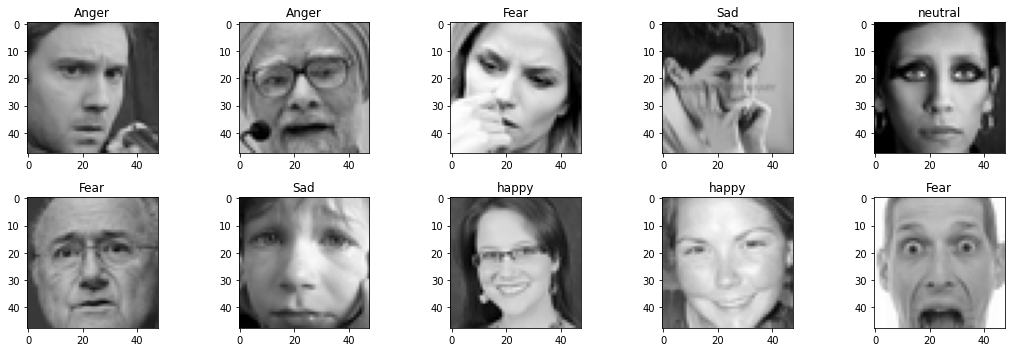

In [ ]:
emotion_name = ["Anger", "Disgust","Fear","happy","Sad","Suprise","neutral"]
plt.figure(figsize=(15,5))
for i,(image,label) in enumerate(train_ds.unbatch().take(10)):
    plt.subplot(2,5,i+1)
    plt.imshow(tf.squeeze(image),cmap="gray") # squeeze to 2d
    plt.title(emotion_name[int(tf.argmax(label))])
plt.tight_layout()

# Importing the Model

In [ ]:
from tensorflow.keras.applications import VGG16
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(48,48,3))

58900480/58889256 [==============================] - 0s 0us/step


#Training the model by Transfer Learning method

In [ ]:
#Freeze all layers
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output)

x = Dense(256, activation='relu')(x)

x = Dense(128, activation='relu')(x)
Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
Dropout(0.5)(x)
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history=model.fit(train_ds,validation_data = val_ds,epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)])

Epoch 1/20
57/57 [==============================] - 39s 366ms/step - loss: 1.7202 - accuracy: 0.3037 - val_loss: 1.6218 - val_accuracy: 0.3656
Epoch 2/20
57/57 [==============================] - 8s 148ms/step - loss: 1.5907 - accuracy: 0.3777 - val_loss: 1.5814 - val_accuracy: 0.3898
Epoch 3/20
57/57 [==============================] - 9s 152ms/step - loss: 1.5422 - accuracy: 0.4045 - val_loss: 1.5549 - val_accuracy: 0.3951
Epoch 4/20
57/57 [==============================] - 9s 156ms/step - loss: 1.5108 - accuracy: 0.4192 - val_loss: 1.5450 - val_accuracy: 0.4007
Epoch 5/20
57/57 [==============================] - 9s 158ms/step - loss: 1.4828 - accuracy: 0.4337 - val_loss: 1.5368 - val_accuracy: 0.4076
Epoch 6/20
57/57 [==============================] - 9s 160ms/step - loss: 1.4574 - accuracy: 0.4463 - val_loss: 1.5434 - val_accuracy: 0.4087
Epoch 7/20
57/57 [==============================] - 9s 151ms/step - loss: 1.4292 - accuracy: 0.4581 - val_loss: 1.5404 - val_accuracy: 0.4093
Epoch

# Testing the model

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Loss :", loss)
print("Accuracy : ",accuracy)

8/8 [==============================] - 2s 141ms/step - loss: 1.5088 - accuracy: 0.4129
Loss : 1.5087870359420776
Accuracy :  0.41292840242385864


#Saving the Model

In [ ]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

## Result for Tansfer Learning

Thus vgg16 models were trained using the pretrained hyperparameters and the results were found as follows:

|Dataset|Accuracy|
|-|-|
|*Training Set*|0.4960|
|*Validation Set*|0.4146|
|*Test Set*|0.4129|


---



# Fine Tuning 

#Implementing Fine-Tuning with Keras


# Importing VGG16 Model

In [ ]:
from tensorflow.keras.applications import VGG16
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(48,48,3))

In [ ]:
#Freeze all layers except last 5 layers
for layer in vgg.layers[:-5]:
  layer.trainable = False


In [ ]:
x = Flatten()(vgg.output)

x = Dense(256, activation='relu')(x)

x = Dense(128, activation='relu')(x)
Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
Dropout(0.5)(x)
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history=model.fit(train_ds,validation_data = val_ds,epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=8,restore_best_weights=True)])

Epoch 1/20
57/57 [==============================] - 12s 197ms/step - loss: 1.1909 - accuracy: 0.5507 - val_loss: 1.3090 - val_accuracy: 0.5074
Epoch 2/20
57/57 [==============================] - 11s 189ms/step - loss: 1.1196 - accuracy: 0.5822 - val_loss: 1.4035 - val_accuracy: 0.4946
Epoch 3/20
57/57 [==============================] - 11s 191ms/step - loss: 1.0568 - accuracy: 0.6086 - val_loss: 1.4386 - val_accuracy: 0.4823
Epoch 4/20
57/57 [==============================] - 11s 188ms/step - loss: 0.9805 - accuracy: 0.6411 - val_loss: 1.3699 - val_accuracy: 0.5277
Epoch 5/20
57/57 [==============================] - 10s 185ms/step - loss: 0.9394 - accuracy: 0.6585 - val_loss: 1.3726 - val_accuracy: 0.5327
Epoch 6/20
57/57 [==============================] - 10s 183ms/step - loss: 0.9740 - accuracy: 0.6426 - val_loss: 1.4111 - val_accuracy: 0.5113
Epoch 7/20
57/57 [==============================] - 11s 196ms/step - loss: 0.9037 - accuracy: 0.6699 - val_loss: 1.4443 - val_accuracy: 0.4987

#Testing the model

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Loss :", loss)
print("Accuracy : ",accuracy)

8/8 [==============================] - 1s 122ms/step - loss: 1.2743 - accuracy: 0.5230
Loss : 1.2742772102355957
Accuracy :  0.522986888885498


#Saving the model

In [ ]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer1.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer1.h5")

# Result for Fine Tuning


The VGG16 model was trained using Fine Tuning method with 4,894,407 Trainable parameters( Parameters for last 3 VGG Layers)  and the result was found as follows:

|Dataset|Accuracy|
|-|-|
|*Training Set*|0.6162|
|*Validation Set*|0.4269|
|*Test Set*| 0.4868|

---


The VGG16 model was trained using Fine Tuning method with **7,079,424 Trainable parameters( Parameters for last 5 VGG Layers) ** and the result was found as follows:

|Dataset|Accuracy|
|-|-|
|*Training Set*|0.7242|
|*Validation Set*|0.5375|
|*Test Set*|0.5229|


---



# Reference 

## References:
[1] [Implementing Transfer Learning with VGG16](https://github.com/krishnaik06/Transfer-Learning)

[2] [Convolutional Neural Network Hyperparameters optimization for Facial Emotion Recognition](https://doi.org/10.1109/ATEE52255.2021.9425073)

[3] [Transfer learning using VGG-16 with Deep Convolutional Neural Network for Classifying Images](https://www.researchgate.net/profile/Srikanth-Tammina/publication/337105858_Transfer_learning_using_VGG-16_with_Deep_Convolutional_Neural_Network_for_Classifying_Images/links/5dc94c3ca6fdcc57503e6ad9/Transfer-learning-using-VGG-16-with-Deep-Convolutional-Neural-Network-for-Classifying-Images.pdf)

[4] [Convolutional-Neural-Network-Hyperparameters-Optimization-for-Facial-Emotion-Recognition](https://github.com/jiantenggei/Convolutional-Neural-Network-Hyperparameters-Optimization-for-Facial-Emotion-Recognition)

[5] [Fine-tuning with Keras and Deep Learning](https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/)


---



#Result

The VGG16 Network MODEL was trained on the FER2013 dataset to predict the facial emotions and the overall Accuracy as follows:

|Method | Accuracy|
|-|-|
|*Transfer Learnig*|0.4129|
|*Fine-Tuning*|0.5229|



---



---



